In [32]:
import joblib

# Logistic Regression

In [33]:
log_reg_first_ver = joblib.load("Models/log_reg_under_sample.pkl") 

In [34]:
import numpy as np

X_train = np.genfromtxt("Data/X_train_under.csv", delimiter=',')
y_train = np.genfromtxt("Data/y_train_under.csv", delimiter=',')

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(log_reg_first_ver, X_train, y_train, cv=3, scoring="f1")

array([0.73565684, 0.74934314, 0.7566719 ])

In [37]:
from sklearn.model_selection import cross_val_predict

In [38]:
y_train_pred = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3)

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [40]:
confusion_matrix(y_train, y_train_pred)

array([[2179,  689],
       [ 746, 2122]], dtype=int64)

In [41]:
precision_score(y_train, y_train_pred)

0.7548914976876556

In [42]:
recall_score(y_train, y_train_pred)

0.7398884239888424

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train, y_train_pred)

0.7473146680753653

In [45]:
from sklearn.metrics import precision_recall_curve

In [46]:
y_scores = cross_val_predict(log_reg_first_ver, X_train, y_train, cv=3, method="predict_proba")

In [47]:
y_scores

array([[0.6472808 , 0.3527192 ],
       [0.10787806, 0.89212194],
       [0.61542137, 0.38457863],
       ...,
       [0.10656319, 0.89343681],
       [0.07665456, 0.92334544],
       [0.59535561, 0.40464439]])

In [48]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores[:, 1])

In [49]:
f1 = (2 * precisions * recalls)/(precisions + recalls)

ipykernel_launcher:1: RuntimeWarning: invalid value encountered in true_divide


In [50]:
import matplotlib.pyplot as plt

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(thresholds, f1[:-1], "r--", label="F1")

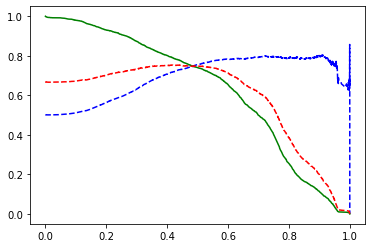

In [52]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds, f1)

In [63]:
THRESHOLD = thresholds[np.argmax(precisions == recalls)]
THRESHOLD

0.485001636269094

In [64]:
preds = np.where(log_reg_first_ver.predict_proba(X_train)[:,1] > THRESHOLD, 1, 0)

In [65]:
import pandas as pd

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
pd.DataFrame(data=[accuracy_score(y_train, preds),
                   recall_score(y_train, preds),
                   precision_score(y_train, preds),
                   f1_score(y_train, preds)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.765865
recall,0.767434
precision,0.765033
f1_score,0.766232


### Test set

In [58]:
X_test = np.genfromtxt("Data/X_test.csv", delimiter=',')
y_test = np.genfromtxt("Data/y_test.csv", delimiter=',')

In [68]:
y_test_pred = np.where(log_reg_first_ver.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [69]:
pd.DataFrame(data=[accuracy_score(y_test, y_test_pred),
                   recall_score(y_test, y_test_pred),
                   precision_score(y_test, y_test_pred),
                   f1_score(y_test, y_test_pred)], 
             index=["accuracy", "recall", "precision", "f1_score"])

,0
accuracy,0.744520
recall,0.742797
precision,0.491508
f1_score,0.591573


In [70]:
confusion_matrix(y_test, y_test_pred)

array([[4288, 1467],
       [ 491, 1418]], dtype=int64)

In [61]:
log_reg_first_ver.n_iter_

array([30])

In [62]:
np.max(np.abs(log_reg_first_ver.coef_))

0.44419937468488824